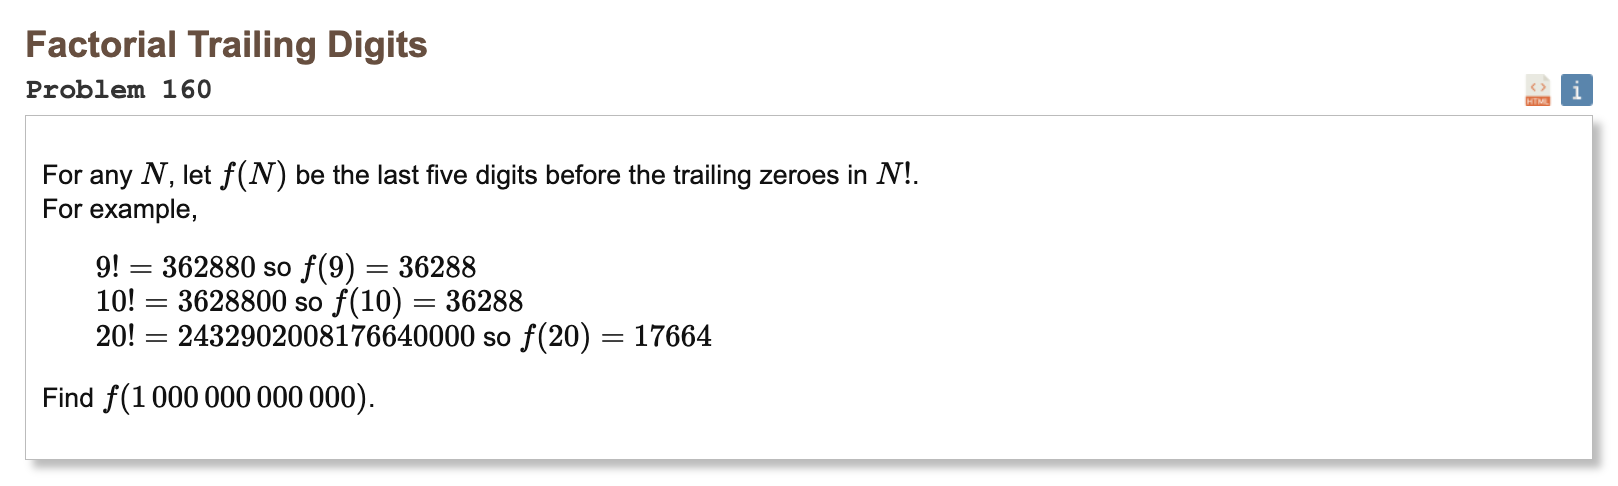

## Initial approach

* strip out all 2s and 5s from n! and keep the rest modulo 100000
* track the balance e2 − e5 so we can multiply back the extra 2s at the end
* use base-5 recursion: split n into blocks of 5 to avoid looping to n
* for the small tail 0..4 use table [1, 1, 2, 6, 24] since none contain factor 5
* each division by 5 contributes a factor 2^{⌊n/5⌋} to compensate removed tens
* combine recursively: F(n) = F(⌊n/5⌋) · T[n mod 5] · 2^{⌊n/5⌋} (mod 100000)
* result is F(n) modulo 100000, which are the last five non-zero digits of n!

In [1]:
def last_five_nonzero_factorial(n):
    M = 100000
    tail = [1, 1, 2, 6, 24]
    def rec(x):
        if x == 0:
            return 1
        return rec(x // 5) * tail[x % 5] * pow(2, x // 5, M) % M
    return rec(n) % M

In [2]:
%%time

n = 10**12
result = last_five_nonzero_factorial(n)
print("Result:", result)

Result: 37536
CPU times: user 510 μs, sys: 132 μs, total: 642 μs
Wall time: 606 μs
